In [1]:
# imports

import pandas as pd
pd.set_option('display.max_rows', 20)
pd.set_option('display.max_columns', 20)

import numpy as np
import gc

#import catboost ## thanks to yandex ! :) 

from sklearn.metrics import mean_squared_error
#from tqdm import tqdm_notebook

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline 

# info about itertools.product: 
# https://pythonworld.ru/moduli/modul-itertools.html
# https://docs.python.org/2/library/itertools.html
from itertools import product

# Работа с данными

Объеденим данные по месяцам:

In [2]:
eff_train = pd.read_csv('data/eff_train/eff_train1.csv', sep=';')
for x in range(2,11):
    eff_train_new = pd.read_csv('data/eff_train/eff_train{}.csv'.format(x), sep=';')
    eff_train = pd.concat([eff_train, eff_train_new])
eff_train = eff_train.rename(columns = {' timestamp':'timestamp', ' value':'value', ' quality':'quality'})
eff_train.head(2)

,tag,timestamp,value,quality
0,Efficiency,01.10.2016 0:00,16137.70,Good
1,Efficiency,01.10.2016 0:00,16060.55,Good


In [3]:
eff_test1 = pd.read_csv('data/eff_test/eff_test1.csv', sep=';')
eff_test2 = pd.read_csv('data/eff_test/eff_test2.csv', sep=';')
eff_test = pd.concat([eff_test1, eff_test2])
eff_test = eff_test.rename(columns = {' timestamp':'timestamp', ' value':'value', ' quality':'quality'})
eff_test.head(2)

,tag,timestamp,value,quality
0,Efficiency,01.08.2017 0:00,16836.91,Good
1,Efficiency,01.08.2017 0:00,17145.51,Good


In [4]:
energy_train = pd.read_csv('data/energy_cons_train/Energy_cons_train1.csv', sep=';')
for x in range(2,11):
    energy_train_new = pd.read_csv('data/energy_cons_train/Energy_cons_train{}.csv'.format(x), sep=';')
    energy_train = pd.concat([energy_train, energy_train_new])
energy_train = energy_train.rename(columns = { ' timestamp':'timestamp', ' value':'value', ' quality':'quality'})
energy_train.head(2)

,tag,timestamp,value,quality
0,Energy_cons,01.10.2016 0:01,20.347508,Good
1,Energy_cons,01.10.2016 0:02,20.24238,Good


In [5]:
energy_test = pd.read_csv('data/energy_cons_test/Energy_cons_test1.csv', sep=';')
x=2
energy_test_new = pd.read_csv('data/energy_cons_test/Energy_cons_test{}.csv'.format(x), sep=';')
energy_test = pd.concat([energy_test, energy_test_new])
energy_test = energy_test.rename(columns = { ' timestamp':'timestamp', ' value':'value', ' quality':'quality'})
energy_test.head(2)

,tag,timestamp,value,quality
0,Energy_cons,01.08.2017 0:01,17.324733,Good
1,Energy_cons,01.08.2017 0:02,17.46305,Good


In [6]:
qual_train = pd.read_csv('data/qual_train/qual_train1.csv', sep=';') 
for x in range(2,11): 
    qual_train_new = pd.read_csv('data/qual_train/qual_train{}.csv'.format(x), sep=';') 
    qual_train = pd.concat([qual_train, qual_train_new]) 
qual_train = qual_train.rename(columns = { ' timestamp':'timestamp', ' value':'value', ' quality':'quality'}) 
qual_train.head(2)

,tag,timestamp,value,quality
0,Quality,01.10.2016 0:38,2.2,Good
1,Quality,01.10.2016 1:02,2.2,Good


In [7]:
qual_test = pd.read_csv('data/qual_test/qual_test1.csv', sep=';') 
x=2 
qual_test_new = pd.read_csv('data/qual_test/qual_test{}.csv'.format(x), sep=';') 
qual_test = pd.concat([qual_test, qual_test_new]) 
qual_test = qual_test.rename(columns = { ' timestamp':'timestamp', ' value':'value', ' quality':'quality'}) 
qual_test.head(2)

,tag,timestamp,value,quality
0,Quality,01.08.2017 0:14,2.2,Good
1,Quality,01.08.2017 0:38,2.2,Good


Объеденим трэйн и тест:

In [8]:
eff_all = pd.concat([eff_train, eff_test])
qual_all = pd.concat([qual_train, qual_test])
energy_all = pd.concat([energy_train, energy_test])

преобразуем колонку timestamp в тип datetime:

In [9]:
eff_all["timestamp"] = pd.to_datetime(eff_all["timestamp"], format = '%d.%m.%Y %H:%M')
qual_all["timestamp"] = pd.to_datetime(qual_all["timestamp"], format = '%d.%m.%Y %H:%M')
energy_all["timestamp"] = pd.to_datetime(energy_all["timestamp"], format = '%d.%m.%Y %H:%M')

In [10]:
eff_all.head(2)

,tag,timestamp,value,quality
0,Efficiency,2016-10-01,16137.70,Good
1,Efficiency,2016-10-01,16060.55,Good


In [11]:
qual_all.head(2)

,tag,timestamp,value,quality
0,Quality,2016-10-01 00:38:00,2.2,Good
1,Quality,2016-10-01 01:02:00,2.2,Good


In [12]:
energy_all.head(2)

,tag,timestamp,value,quality
0,Energy_cons,2016-10-01 00:01:00,20.347508,Good
1,Energy_cons,2016-10-01 00:02:00,20.24238,Good


Уберем лики в данных:

In [13]:
energy_all["value"] = pd.to_numeric(energy_all["value"], downcast = 'float', errors='coerse')
energy_all = energy_all[energy_all["value"].notnull()]

In [14]:
energy_all = energy_all[energy_all["quality"] == "Good"]
qual_all = qual_all[qual_all["quality"] == "Good"]
eff_all = eff_all[eff_all["quality"] == "Good"]
eff_all = eff_all[eff_all["value"] > 0.0]
qual_all = qual_all[qual_all["value"] > 0.0]
energy_all = energy_all[energy_all["value"] > 0.0]

In [15]:
energy_all["value"] = pd.to_numeric(energy_all["value"], downcast = 'float', errors='coerse')
energy_all = energy_all[energy_all["value"].notnull()]

# Визуализируем данные

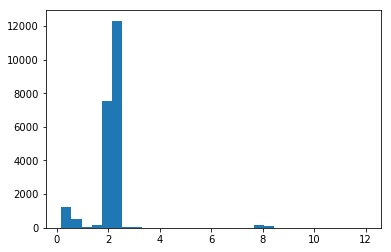

In [16]:
plt.hist(qual_all["value"], 30)
plt.show()

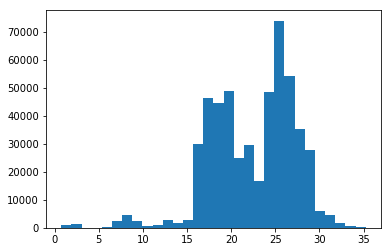

In [17]:
plt.hist(energy_all["value"], 30)
plt.show()

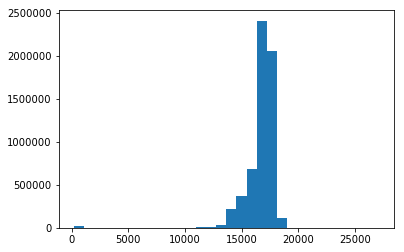

In [18]:
plt.hist(eff_all["value"], 30)
plt.show()

In [20]:
def my_plot(data):
    df_date = np.array(data['timestamp'])
    df_value = np.array(data['value'])

    df_date = pd.to_datetime(df_date)
    ser = pd.Series(df_value, df_date)
    ser.plot()

In [21]:
def my_plot_anomaly(data, low, upper):
    df_date = np.array(data['timestamp'])
    df_value = np.array(data['value'])

    df_date = pd.to_datetime(df_date)
    ser = pd.Series(df_value, df_date)
    ser = ser[(ser < low) | (ser > upper)]
    ser.plot()

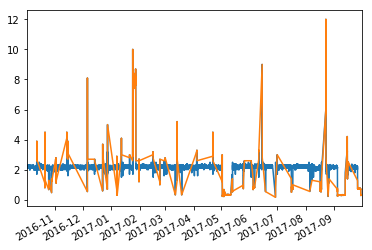

In [95]:
my_plot(qual_all)
my_plot_anomaly(qual_all, 1.5, 2.5)

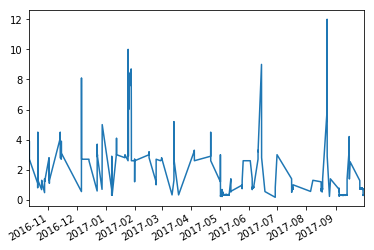

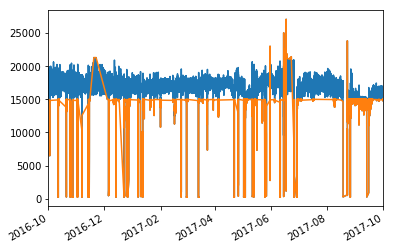

In [96]:
my_plot(eff_all)
my_plot_anomaly(eff_all, 15000, 21000)

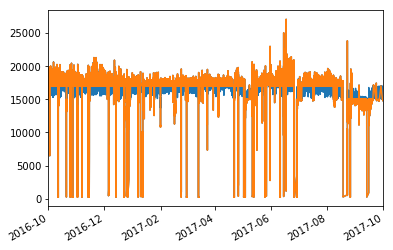

In [97]:
my_plot(eff_all)
my_plot_anomaly(eff_all, 15000, 17000)

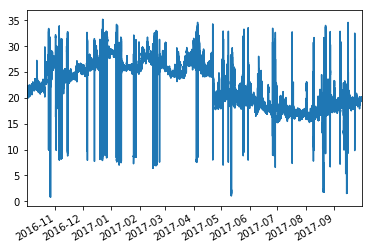

In [26]:
my_plot(energy_all)

# Построим arima qual_all

In [23]:
from statsmodels.tsa.arima_model import ARIMA

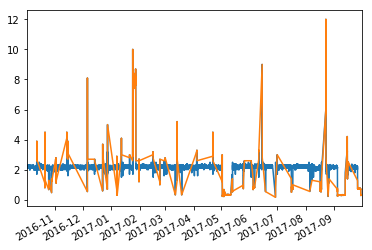

In [24]:
my_plot(qual_all)
my_plot_anomaly(qual_all, 1.5, 2.5)

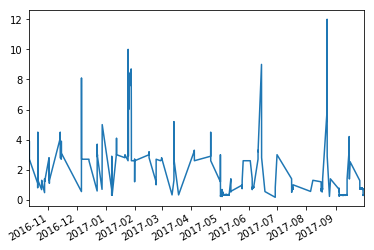

In [30]:
data = qual_all
low = 1.5
upper = 2.5

df_date = np.array(data['timestamp'])
df_value = np.array(data['value'])

df_date = pd.to_datetime(df_date)

#ser - это ряд с аномалиями
ser = pd.Series(df_value, df_date)
ser = ser[(ser < low) | (ser > upper)]

ser.diff()

ser.plot()

                             ARIMA Model Results                              
Dep. Variable:                    D.y   No. Observations:                 2261
Model:                 ARIMA(5, 1, 0)   Log Likelihood               -1275.768
Method:                       css-mle   S.D. of innovations              0.425
Date:                Sun, 26 Nov 2017   AIC                           2565.535
Time:                        12:00:41   BIC                           2605.600
Sample:                    10-11-2016   HQIC                          2580.155
                         - 09-30-2017                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0011      0.007     -0.158      0.874      -0.015       0.012
ar.L1.D.y      0.0497      0.021      2.363      0.018       0.008       0.091
ar.L2.D.y     -0.2497      0.021    -11.889      0.0

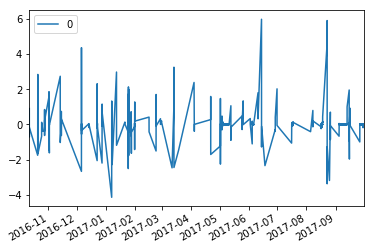

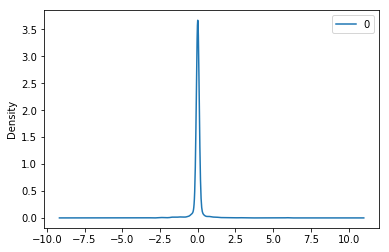

                 0
count  2261.000000
mean      0.000107
std       0.425529
min      -4.124267
25%      -0.008551
50%       0.001383
75%       0.011003
max       5.959056


In [34]:
        model = ARIMA(ser, order = (5, 1, 0))
        model_fit = model.fit(disp = 0)
        print(model_fit.summary())
        residuals = pd.DataFrame(model_fit.resid)
        residuals.plot()
        plt.show()
        residuals.plot(kind='kde')
        plt.show()
        print(residuals.describe())

In [40]:
df = pd.DataFrame(ser)
df = df.reset_index()
df.columns = ['timestamp', 'value']
df.head()

,timestamp,value
0,2016-10-11 17:35:00,2.6
1,2016-10-11 17:50:00,3.5
2,2016-10-11 18:05:00,3.9
3,2016-10-11 18:20:00,3.0
4,2016-10-11 18:35:00,2.7


In [62]:
size = df.shape[0]
train_size = int(size / 100. * 60.)
x_train = df.iloc[0:train_size, 1]
y_train = df.iloc[0:train_size, 0]

x_test = df.iloc[train_size + 1:, 1]
y_test = df.iloc[train_size + 1:, 0]
print(y_train.head(), x_train.head())
print(x_train.shape[0], y_train.shape[0])

0   2016-10-11 17:35:00
1   2016-10-11 17:50:00
2   2016-10-11 18:05:00
3   2016-10-11 18:20:00
4   2016-10-11 18:35:00
Name: timestamp, dtype: datetime64[ns] 0    2.6
1    3.5
2    3.9
3    3.0
4    2.7
Name: value, dtype: float64
1357 1357


In [72]:
ser_train = pd.Series(data = x_train.values.tolist(), index = y_train)
model = ARIMA(ser_train, order = (5, 1, 0))
model_fit = model.fit(disp = 0)